In [2]:
from preprocessor import Preprocessor
import pandas as pd
import scorecardpy as sc
import matplotlib.pyplot as plt
from df_template import render_mpl_table
import numpy as np

In [3]:
df = pd.read_excel("Project 2 - Data.xls")
preprocessor=Preprocessor(df)
preprocessor.remove_duplicates()
preprocessor.adjust_excel()

df.columns #columns
len(df) #number of records
defaults=df['DEFAULT_FLAG'].to_numpy()
np.sum(defaults) #number of defaults
558/5801

0.0961903120151698

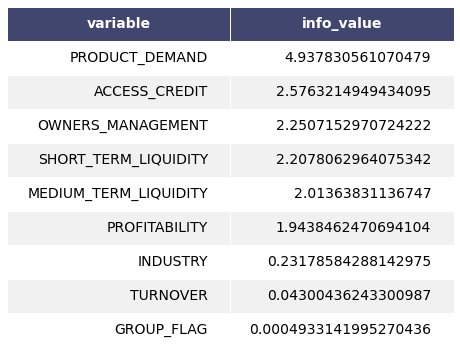

In [4]:
df = pd.read_excel("Project 2 - Data.xls")
preprocessor=Preprocessor(df)
preprocessor.remove_duplicates()
preprocessor.adjust_excel_no_iv()

iv_table = sc.iv(df, 'DEFAULT_FLAG')
fig, ax = render_mpl_table(iv_table, col_width= 4.0)
fig.savefig("iv_table.png")

In [5]:
iv_table['variable']

5           PRODUCT_DEMAND
7            ACCESS_CREDIT
8        OWNERS_MANAGEMENT
0     SHORT_TERM_LIQUIDITY
4    MEDIUM_TERM_LIQUIDITY
6            PROFITABILITY
2                 INDUSTRY
3                 TURNOVER
1               GROUP_FLAG
Name: variable, dtype: object

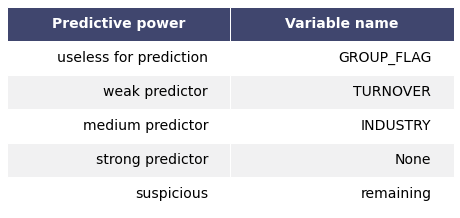

In [6]:
data = [['useless for prediction', 'GROUP_FLAG'], ['weak predictor', 'TURNOVER'], ['medium predictor', 'INDUSTRY'], ['strong predictor','None'],['suspicious','remaining']]
predictor_table = pd.DataFrame(data, columns = ['Predictive power', 'Variable name'])
fig, ax = render_mpl_table(predictor_table, col_width= 4.0)
fig.savefig("predictor_table.png")

[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
      DEFAULT_FLAG  INDUSTRY_woe  TURNOVER_woe  PRODUCT_DEMAND_woe  \
3                0     -0.328769      0.118140            1.790784   
9                0      0.356675      0.118140           -2.649856   
19               0     -0.328769      0.118140           -2.649856   
24               1     -0.328769      0.118140            2.869692   
27               0      0.356675      0.118140           -2.649856   
...            ...           ...           ...                 ...   
5769             0     -0.328769     -0.586616           -2.649856   
5772             0     -0.328769     -0.586616           -2.649856   
5783             0     -0.328769     -0.586616           -2.649856   
5794             0      0.749098     -0.586616           -2.649856   
5795             0     -0.328769     -0.586616           -2.649856   

      PROFITABILITY_

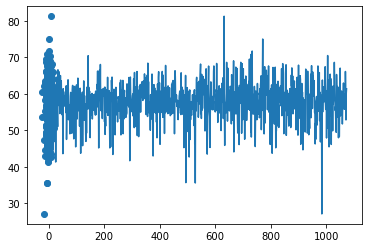

[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
      DEFAULT_FLAG  INDUSTRY_woe  TURNOVER_woe  PRODUCT_DEMAND_woe  \
3                0     -0.328769      0.118140            1.790784   
9                0      0.356675      0.118140           -2.649856   
19               0     -0.328769      0.118140           -2.649856   
24               1     -0.328769      0.118140            2.869692   
27               0      0.356675      0.118140           -2.649856   
...            ...           ...           ...                 ...   
5769             0     -0.328769     -0.586616           -2.649856   
5772             0     -0.328769     -0.586616           -2.649856   
5783             0     -0.328769     -0.586616           -2.649856   
5794             0      0.749098     -0.586616           -2.649856   
5795             0     -0.328769     -0.586616           -2.649856   

      PROFITABILITY_

In [7]:
from logistic_regression import score as log_regr_score
from implied_model import score as implied_score
from linear_regression import score as linear_score
from probit_regression import score as probit_score

values=[]
values.append(log_regr_score)
values.append(probit_score)
values.append(linear_score)
values.append(implied_score)

[0.9385474860335196, 0.904096834264432, 0.5791364179047758, 0.07415688466554872]


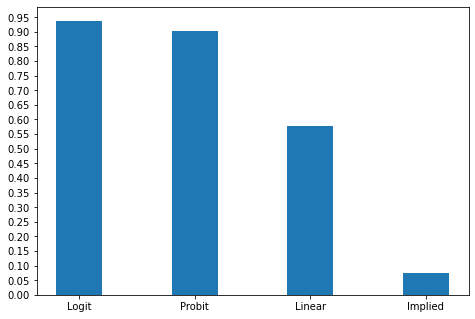

In [8]:
print(values)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.yticks(np.arange(0,1,0.05))

models = ['Logit', 'Probit', 'Linear','Implied']
scores=values
ax.bar(models,scores,width=0.4)

plt.show()


<ipython-input-9-e33b1e3915e3>:3: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig('barh_scores.png', dpi=100, facecolor='w', edgecolor='w',


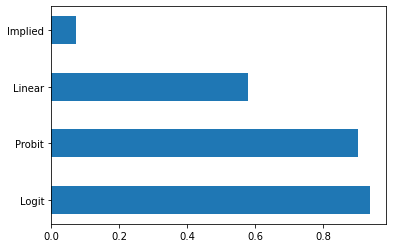

<Figure size 432x288 with 0 Axes>

In [9]:
plt.barh(y=models,width=scores,height=0.5)
fig=plt.figure()
fig.savefig('barh_scores.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

KeyError: Index(['Unnamed: 1', 'Unnamed: 2'], dtype='object')